# Machine Learning Algorithms

The goal of this project is to get better understanding of Algorithms as well as interview preparation process for ML engineer roles.


## K-means clustering


**K-means clustering from scratch in Python implementation**

<font color='red'>вводная картинка с точками по кластерам и писаниной от руки, типа обложки</font> 

Nowadays to make life of data scientisnts and ML developers easier there are so many different libraries that work like magic and solve complex problems for us. We don't have to write all the hard work from scratch in order the algorithm works, but I believe writing a machine learning algorithm from scratch is an extremely rewarding learning experience.

In this post I'll walk you through the k-means algorithm step-by-step. In order to understand how libraries we use work under the hood we'll develop the code for the algorithm from scratch using Python.



K-means algorithm is one of the simplest and popular unsupervised machine learning algorithm (we don’t have any target variable as in the case of supervised learning). It solves the clustering problem with certain number of clusters - k. 

<font color='red'>схемы алгоритмов</font> 

K-means clustering begins with **k** randomly placed **centroids** (points in space that represent the center of the cluster), and assigns every item to the nearest one. After
the assignment, the centroids are moved to the average location of all the nodes
assigned to them, and the assignments are redone. This process repeats until the
assignments stop changing.


<font color='red'>картинка из книги поэтапно кк меняются центройды</font> 

In the first frame, the two centroids (shown as dark circles) are placed randomly.
Frame 2 shows that each of the items is assigned to the nearest centroid—in this
case, A and B are assigned to the top centroid and C, D, and E are assigned to the
bottom centroid. In the third frame, each centroid has been moved to the average
location of the items that were assigned to it. When the assignments are calculated
again, it turns out that C is now closer to the top centroid, while D and E remain
closest to the bottom one. Thus, the final result is reached with A, B, and C in one
cluster, and D and E in the other.

<font color='red'>Схема цикл алгоритма https://www.kdnuggets.com/2017/06/machine-learning-workflows-python-scratch-part-2.html</font> 



Код и описание

Сравнение кода с нуля и библиотеки

**Заключеие**



Интересные ссылки :

https://github.com/ShawnLeee/the-book/blob/master/pybooks/Programming%20Collective%20Intelligence.pdf

https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a

https://www.kdnuggets.com/2017/05/machine-learning-workflows-python-scratch-part-1.html

K-means cycle:
1. Pick a value for k
2. /Initizlize centroids starting points in your data
3. Create clusthes. Assign each point to the nearest centroid
4. Make you cluster better. Move each centroif yo the center of its cluset
5. Repeat steps 3-4 until you centroids converge

In [ ]:
import random

def kcluster(rows, distance = pearson, k=4):
    # Determine the minimum and maximum values for each point
    ranges=[(min([row[i] for row in rows]),max([row[i] for row in rows]))
    for i in range(len(rows[0]))]
    
    # Create k randomly placed centroids
    clusters=[[random.random( )*(ranges[i][1]-ranges[i][0])+ranges[i][0]
    for i in range(len(rows[0]))] for j in range(k)]
    
    lastmatches=None
    for t in range(100):
        print ('Iteration %d' % t)
        bestmatches=[[] for i in range(k)]
    # Find which centroid is the closest for each row
    for j in range(len(rows)):
        row=rows[j]
        bestmatch=0
        for i in range(k):
            d=distance(clusters[i],row)
            if d<distance(clusters[bestmatch],row): bestmatch=i
        bestmatches[bestmatch].append(j)
                    
    # If the results are the same as last time, this is complete
    if bestmatches==lastmatches: break
    lastmatches=bestmatches
                        
    # Move the centroids to the average of their members
    for i in range(k):
        avgs=[0.0]*len(rows[0])
        if len(bestmatches[i])>0:
            for rowid in bestmatches[i]:
                for m in range(len(rows[rowid])):
                    avgs[m]+=rows[rowid][m]
            for j in range(len(avgs)):
                avgs[j]/=len(bestmatches[i])
            clusters[i]=avgs
    return bestmatches

## Final code

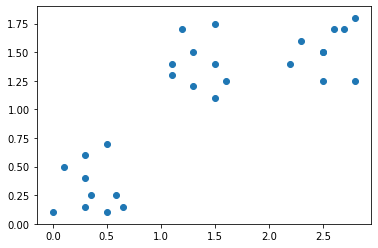

In [22]:
import matplotlib.pyplot as plt

data = [
    (0,0.1),(0.5,0.7),(0.3,0.6),(0.1,0.5),(0.3,0.4),(0.5,0.1),(0.65,0.15),(0.59,0.25),(0.35,0.25),(0.3,0.15),
    (1.3,1.5),(1.3,1.2),(1.1,1.3),(1.1,1.4),(1.5,1.4),(1.5,1.1),(1.6,1.25),(1.5,1.75),(1.2,1.7),
    (2.5,1.5),(2.7,1.7),(2.6,1.7),(2.5,1.5),(2.8,1.8),(2.3,1.6),(2.8,1.25),(2.5,1.25),(2.2,1.4)
    ]

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

plt.scatter(x_val,y_val);

### K-means using  sklearn

In [109]:
from sklearn.cluster import KMeans

In [128]:
km = KMeans(n_clusters = 3, init='random')
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [129]:
km.cluster_centers_

array([[1.3       , 1.31666667],
       [2.6       , 1.57857143],
       [0.28333333, 0.4       ]])

In [130]:
km.labels_

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)